# Fashion Mnist


In this notebook the goal is to write a CNN that can classify clothing items. Use the code in cifar 10 notebook as a reference to achieve this. The dataset was downloaded from [here](https://github.com/zalandoresearch/fashion-mnist). 


# Image Preperation

Run the bellow cells to read the images into memory.



In [1]:
import os
import gzip
import numpy as np

In [2]:
def load_mnist(path, kind='train'):

    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
path = 'data/' #change this path to where you kept the data

In [4]:
imgs,labels = load_mnist(path)

Reshape the images to be 28 by 28

In [5]:
imgs.shape #number of images, flattened shape

(60000, 784)

You may wish to plot the images as a sanity check.

In [6]:
check=imgs[0].reshape(28,28)

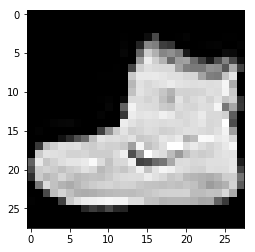

In [9]:
import matplotlib.pyplot as plt 
plt.imshow(check,cmap="gray")

# Label Prepration

You need to onehot encode the training labels.

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
print ('labels: ',np.unique(labels),'shape: ',labels.shape)

labels:  [0 1 2 3 4 5 6 7 8 9] shape:  (60000,)


In [13]:
y = keras.utils.to_categorical(labels)
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Model

In general using more layers can allow you to learn more complex relationships in data however the network will take much longer to train. However more layers doesn't always mean a better model and it can increase your chances of overfitting, to prevent this we often add dropout layers.

The layers you need are bellow, make sure before you connect the output from a Convlutional layer to a dense layer you flatten it.

In [1]:
from keras.layers import Conv2D, Flatten, Dense, Dropout

# Loss function and Compile

Since this is a classication problem we'll need to use catergorical crossentropy for the loss function.  For optimizers there are a lot of choices, a good pick is Adadelta which provides us with an active learning rate.

In [75]:
batch_size = 1000
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28,28
input_shape = (img_rows, img_cols, 1)

In [61]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
# reshape from 60000,784 -> 60000,28,28,1
imgs = imgs.reshape (60000,28,28,1)
# only select the first 10000 imgs to reduce the time to train the model
X_train = imgs[:10000]      # shape will be (10000,28,28,1)
y_train = y[:10000]         # shape will be (10000,10)

In [77]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,epochs=20,batch_size=32,
validation_split=0.2)


Epoch 1/10
10000/10000 [==============================] - 113s - loss: 9.6623 - acc: 0.3594    
Epoch 2/10
10000/10000 [==============================] - 157s - loss: 5.1141 - acc: 0.5719    
Epoch 3/10
10000/10000 [==============================] - 161s - loss: 1.0242 - acc: 0.6795    
Epoch 4/10
10000/10000 [==============================] - 157s - loss: 0.8261 - acc: 0.7212    
Epoch 5/10
10000/10000 [==============================] - 149s - loss: 0.7622 - acc: 0.7394    
Epoch 6/10
10000/10000 [==============================] - 141s - loss: 0.7149 - acc: 0.7576    
Epoch 7/10
10000/10000 [==============================] - 141s - loss: 0.6528 - acc: 0.7788    
Epoch 8/10
10000/10000 [==============================] - 143s - loss: 0.6262 - acc: 0.7859    
Epoch 9/10
10000/10000 [==============================] - 143s - loss: 0.5918 - acc: 0.7920    
Epoch 10/10
10000/10000 [==============================] - 138s - loss: 0.5468 - acc: 0.8043    


In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

# Train

Train the model. Depending on you machine espcially if you don't have a GPU it may take longer to train. 

# Plotting

After we've trained the model it's good practive to plot the validation loss and accuracy, from this we can see if any over fitting is occuring.

```python
history = model.fit(#parameters in here)
```

The history variable will contain the validation and accuracy.

# Prediction

Use you newly trained model to predict the class of the clothing, what's the accuracy rate? 

In [66]:
X_test = imgs[10000:20000]      # shape will be (10000,28,28,1)
y_test = y[10000:20000]

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.43910431555509566
Test accuracy: 0.8474


In [20]:
y_pred = model.predict(X_test)

Text(0.5,1,"('Label: ', 7, 'Pred: ', 7, 'Prob: ', 0.5417433)")

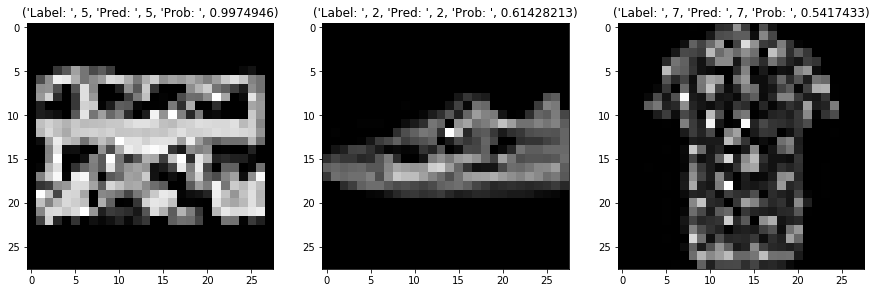

In [65]:
fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(X_test[0].reshape(28,28),cmap="gray")
ax[0].set_title(('Label: ',labels[np.argmax(y_test[0])],"Pred: ",labels[np.argmax(y_pred[0])],"Prob: ",y_pred[0][np.argmax(y_pred[0])]))
ax[1].imshow(X_test[1].reshape(28,28),cmap="gray")
ax[1].set_title(('Label: ',labels[np.argmax(y_test[1])],"Pred: ",labels[np.argmax(y_pred[1])],"Prob: ",y_pred[1][np.argmax(y_pred[1])]))
ax[2].imshow(X_test[2].reshape(28,28),cmap="gray")
ax[2].set_title(('Label: ',labels[np.argmax(y_test[2])],"Pred: ",labels[np.argmax(y_pred[2])],"Prob: ",y_pred[2][np.argmax(y_pred[2])]))


# Saving and Loading Models

In [2]:
from keras.models import load_model

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [3]:
# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

#preds  = model.predict(x_test[:10])
#np.argmax(preds,axis=0)